## Prosper Lending: Who Are The Most Profitable Borrowers?

This notebook is aimed at looking into the main value drivers of the P2P Lending marketplace Prosper, to ascertain which loans drive the revenues and perform a profiling of the most profitable borrowers. 

The main value drivers are:

- **Number of Originations**: indicates the ability to attract borrowers.
- **Servicing Fees** and **Origination Fees**: they comprise the core revenue stream for Porsper. For the aim of this analysis only Origination Fees are going to be considered as woth the data available is not possible to carry out a thorough analysis of Servicing Fees.
- **Lender Returns**: they are pivotal to attract lender on the platform. Loan must offer a decent return (given a certain risk level) to attract lenders (Servicing Fees)

**The Origination Fees are the focus of our analysis.** They are calucated as a percentage (depending on the risk profile) of the amount requested by the borrower. Therefore the main variables involved are:

- The Prosper Rating of the borrower.
- The amount requested by the borrower.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data
loans_data=pd.read_csv('loans_data')
profitable_loans=pd.read_csv('profitable_loans')

In [4]:
#Set plotting style
plt.style.use('ggplot')

### Distribution of Origination Rate and Loan Amounts

The distribution of the Originations Fees and the Loan Amounts have the same distribution shape, skewed to the left, as the Origination fee is calculated on the Loan Amount. Hence it one of the drivers of the Origination Fees.

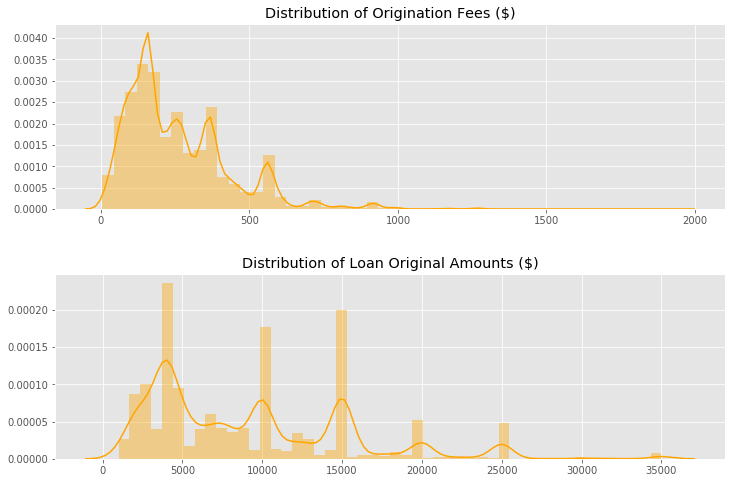

In [12]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
sns.distplot(np.array(loans_data['OriginationFee']), ax=ax1, color='orange').set_title('Distribution of Origination Fees ($)')
sns.distplot(np.array(loans_data['LoanOriginalAmount']), ax=ax2, color='orange').set_title('Distribution of Loan Original Amounts ($)')
plt.subplots_adjust(hspace=0.35)

#### Top loan classes by Originations, Origination Fees and Loan Amounts

Considering the percentage of origination fees, amount granted and amount of origination, the **top six positions are covered by the same classes of loans**.

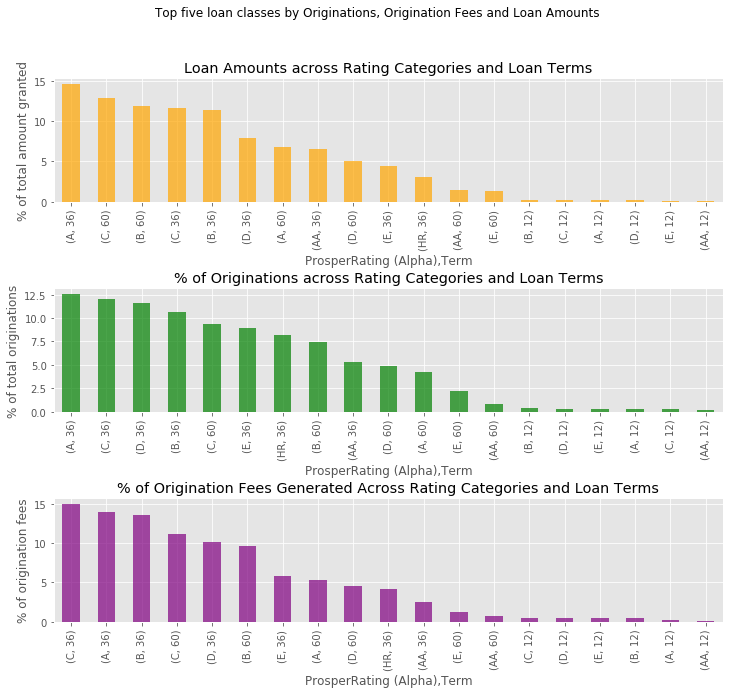

In [14]:
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['LoanOriginalAmount'].sum().sort_values(ascending=False)/loans_data['LoanOriginalAmount'].sum()*100).plot(kind='bar',title=('Loan Amounts across Rating Categories and Loan Terms'), ax=ax1, color='orange', alpha=0.7).set_ylabel('% of total amount granted')
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].count().sort_values(ascending=False)/loans_data.shape[0]*100).plot(kind='bar', title=('% of Originations across Rating Categories and Loan Terms'), ax=ax2, color='green', alpha=0.7).set_ylabel('% of total originations')
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loans_data['OriginationFee'].sum()*100).plot(kind='bar', title=('% of Origination Fees Generated Across Rating Categories and Loan Terms'), ax=ax3, color='purple', alpha=0.7).set_ylabel('% of origination fees')
plt.suptitle('Top five loan classes by Originations, Origination Fees and Loan Amounts')
plt.subplots_adjust(wspace = 0.9, hspace = 0.7)

### Loan Picking

For the purpose of the analysis the loans that are going to be picked as most profitable are those that generated the highest proportion of Origination Fees which is the main metric to ascertain whether a loan is profitable for Prosper or not.

The loans that, according to historical data, have generated the **most of Origination Fees** are: **C36**, **A36**, **B36**, **C60**, **D36** and **B60**.

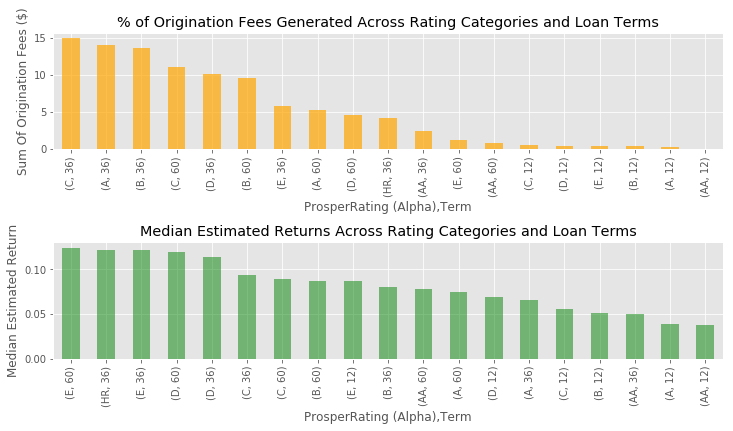

In [7]:
fig=plt.figure(figsize=[20,12])
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
(loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['OriginationFee'].sum().sort_values(ascending=False)/loans_data['OriginationFee'].sum()*100).plot(kind='bar', figsize=(12,6), ax=ax1, title='% of Origination Fees Generated Across Rating Categories and Loan Terms', color='orange', alpha=0.7).set_ylabel('Sum Of Origination Fees ($)')
loans_data.groupby(['ProsperRating (Alpha)', 'Term'])['EstimatedReturn'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), ax=ax2, title='Median Estimated Returns Across Rating Categories and Loan Terms', color='green', alpha=0.5).set_ylabel('Median Estimated Return')
plt.subplots_adjust(hspace=0.8)

### Origination Fees and total loan originations across profitable loans and rest of loans

The most profitable loans are the 63.4% of the total loans and generate the 73.4% of the Origination Fees. The most profitable class of loans is A36, which has the lowest risk profile and is the 12.5% of the total loans and generates the 14% of Origination Fees. 

|Propsper Rating & Loan Term|% of originations|% of Origination Fees|
|---------------------------|:---------------:|:-------------------:|
|A36                        |12.55            |13.99                |   
|B36                        |10.62            |13.59                |   
|B60                        |7.39             |9.62                 |   
|C36                        |11.97            |14.95                |    
|C60                        |9.33             |11.11                |   
|D36                        |11.55            |10.16                |   

Text(0.5, 0.98, 'Origination Fees and total loan originations across profitable loans and rest of loans')

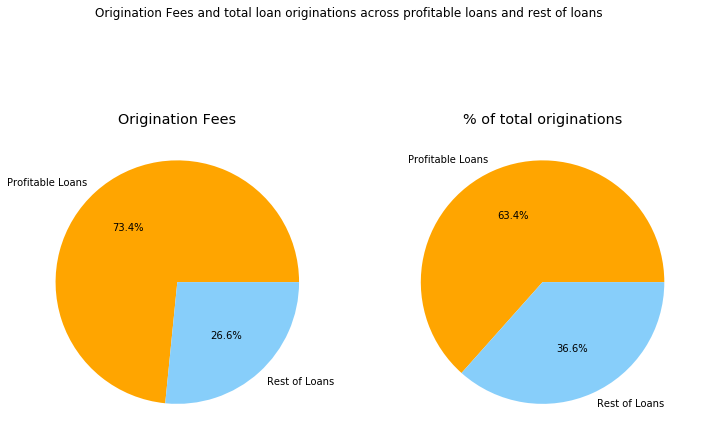

In [8]:
fig=plt.figure(figsize=[12,8])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.pie([profitable_loans['OriginationFee'].sum(),loans_data['OriginationFee'].sum()-profitable_loans['OriginationFee'].sum()],labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%', colors = ['orange', 'lightskyblue'])
ax1.set_title('Origination Fees')
ax2.pie([profitable_loans.shape[0],loans_data.shape[0]-profitable_loans.shape[0]], labels=['Profitable Loans','Rest of Loans'],autopct='%1.1f%%',colors = ['orange', 'lightskyblue'])
ax2.set_title('% of total originations')
fig.suptitle('Origination Fees and total loan originations across profitable loans and rest of loans')

### Median values of Credit History Variables across Rating Categories and Loan Terms

Regarding the credit history the most discriminating variable is the **number of inquiries**, which slightly increases as the profile risk increases.

<Figure size 864x432 with 0 Axes>

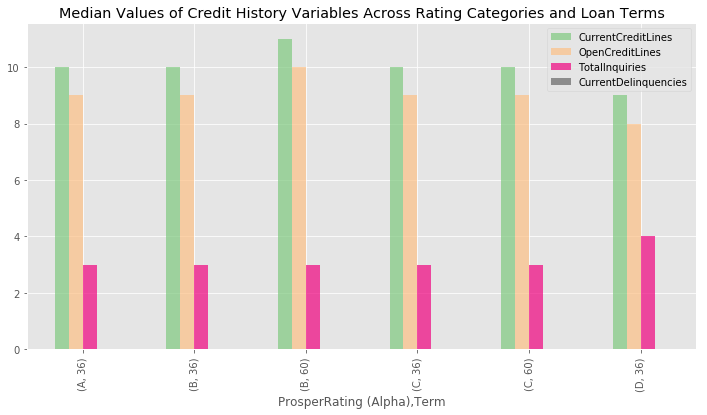

In [9]:
plt.figure(figsize=(12,6))
profitable_loans.groupby(['ProsperRating (Alpha)', 'Term'])[['CurrentCreditLines','OpenCreditLines','TotalInquiries','CurrentDelinquencies']].median().plot(kind='bar',figsize=(12,6), title='Median Values of Credit History Variables Across Rating Categories and Loan Terms', colormap='Accent', alpha=0.7)

### Do Prosper past borrowers have lower Origination Fees?

The **past Prosper borrowers are able to obtain a slightly lower Origination rate**, which may be due to the fact tha Prosper has more data available on past borrowers and therefore the chance to perform a better profiling.

Text(0.5, 0.98, 'Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')

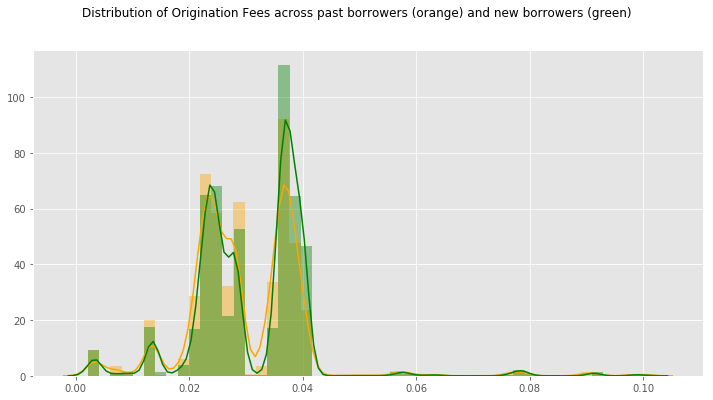

In [11]:
fig=plt.figure(figsize=(12,6))
sns.distplot(np.array(loans_data.query('PastProsperBorrower=="Yes"')['OriginationRate']), color='orange' )
sns.distplot(np.array(loans_data.query('PastProsperBorrower=="No"')['OriginationRate']), color='green')
fig.suptitle('Distribution of Origination Fees across past borrowers (orange) and new borrowers (green)')